<a href="https://colab.research.google.com/github/Samia35-2973/Machine-Learning-Notes/blob/main/k_mean_clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [158]:
from sklearn.cluster import KMeans
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from matplotlib import pyplot as plt
%matplotlib inline

In [159]:
df = pd.read_csv("income.csv")
df.head()

,Name,Age,Income($)
0,Rob,27,70000
1,Michael,29,90000
2,Mohan,29,61000
3,Ismail,28,60000
4,Kory,42,150000


Text(0, 0.5, 'Income($)')

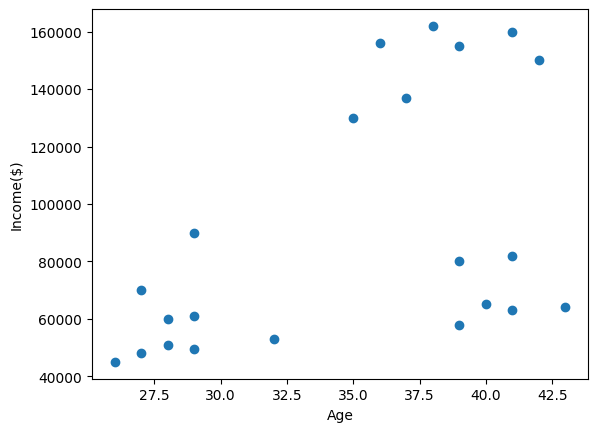

In [160]:
plt.scatter(df.Age,df['Income($)'])
plt.xlabel('Age')
plt.ylabel('Income($)')

In [161]:
km = KMeans(n_clusters=3)
km

KMeans(n_clusters=3)

Now we will fit and predict the cluster that each dataframe belong

In [162]:
y_predicted = km.fit_predict(df[['Age', 'Income($)']])
y_predicted

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


array([0, 0, 2, 2, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 2],
      dtype=int32)

In [163]:
df['Cluster'] = y_predicted
df

,Name,Age,Income($),Cluster
0,Rob,27,70000,0
1,Michael,29,90000,0
2,Mohan,29,61000,2
3,Ismail,28,60000,2
4,Kory,42,150000,1
5,Gautam,39,155000,1
6,David,41,160000,1
7,Andrea,38,162000,1
8,Brad,36,156000,1
9,Angelina,35,130000,1


Now we will visualize the data according to the clusters

Text(0, 0.5, 'Income($)')

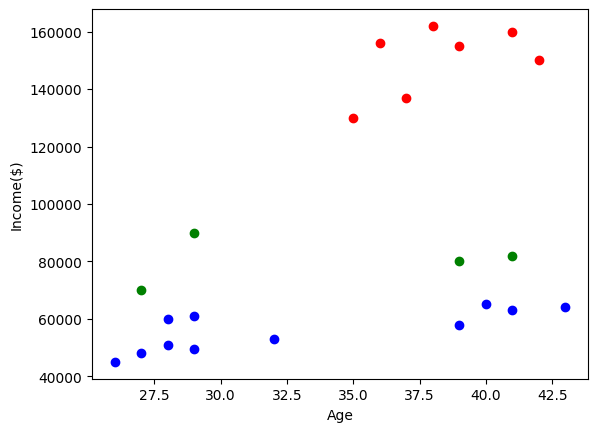

In [164]:
# taking individual dataframe according to the cluster
df1 = df[df.Cluster==0]
df2 = df[df.Cluster==1]
df3 = df[df.Cluster==2]

plt.scatter(df1.Age,df1['Income($)'], color='green')
plt.scatter(df2.Age,df2['Income($)'], color='red')
plt.scatter(df3.Age,df3['Income($)'], color='blue')
plt.xlabel('Age')
plt.ylabel('Income($)')

According to the scatterplots the green and blue cluster members are not grouped correctly. Because scaling is wrong. Y range is in thousands while x range is very small. Hence we need to scale by min_max_scaler to preprocess the data

In [165]:
scaler = MinMaxScaler()
scaler.fit(df[['Age']])
df[['Age']] = scaler.transform(df[['Age']])
scaler.fit(df[['Income($)']])
df[['Income($)']] = scaler.transform(df[['Income($)']])
df

,Name,Age,Income($),Cluster
0,Rob,0.058824,0.213675,0
1,Michael,0.176471,0.384615,0
2,Mohan,0.176471,0.136752,2
3,Ismail,0.117647,0.128205,2
4,Kory,0.941176,0.897436,1
5,Gautam,0.764706,0.940171,1
6,David,0.882353,0.982906,1
7,Andrea,0.705882,1.000000,1
8,Brad,0.588235,0.948718,1
9,Angelina,0.529412,0.726496,1


In [166]:
y_predicted = km.fit_predict(df[['Age', 'Income($)']])
y_predicted

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


array([0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2],
      dtype=int32)

In [167]:
df = df.drop(df[['Cluster']], axis='columns')
df['Cluster'] = y_predicted
df

,Name,Age,Income($),Cluster
0,Rob,0.058824,0.213675,0
1,Michael,0.176471,0.384615,0
2,Mohan,0.176471,0.136752,0
3,Ismail,0.117647,0.128205,0
4,Kory,0.941176,0.897436,1
5,Gautam,0.764706,0.940171,1
6,David,0.882353,0.982906,1
7,Andrea,0.705882,1.000000,1
8,Brad,0.588235,0.948718,1
9,Angelina,0.529412,0.726496,1


In [168]:
km.cluster_centers_

array([[0.1372549 , 0.11633428],
       [0.72268908, 0.8974359 ],
       [0.85294118, 0.2022792 ]])

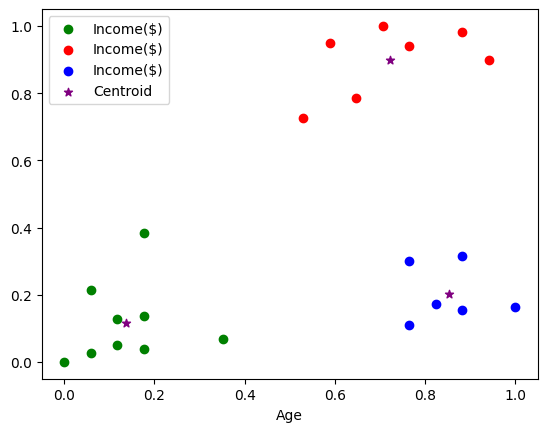

In [169]:
# taking individual dataframe according to the cluster
df1 = df[df.Cluster==0]
df2 = df[df.Cluster==1]
df3 = df[df.Cluster==2]
plt.xlabel('Age')
plt.scatter(df1.Age,df1['Income($)'], color='green', label = 'Income($)')
plt.scatter(df2.Age,df2['Income($)'], color='red', label = 'Income($)')
plt.scatter(df3.Age,df3['Income($)'], color='blue', label = 'Income($)')
plt.scatter(km.cluster_centers_[:,0], km.cluster_centers_[:, 1], color='purple', marker='*', label='Centroid')
plt.legend()

Now we have to find the elbow to find the correct k

In [170]:
sse = []
for k in range(1, 10):
  KM = KMeans(n_clusters=k)
  KM.fit(df[['Age', 'Income($)']])
  sse.append(KM.inertia_)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

Text(0, 0.5, 'Sum of squared error')

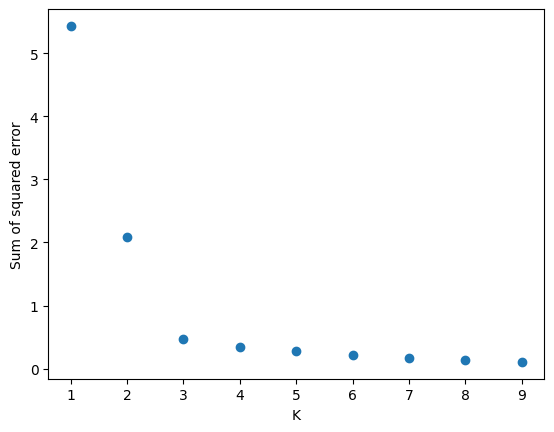

In [171]:
plt.scatter(range(1,10), sse)
plt.xlabel('K')
plt.ylabel('Sum of squared error')

from plot we can see the elbow is in k = 3